In [83]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 950)
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from imblearn.over_sampling import SMOTE

In [84]:
df = pd.read_csv('whiskey_database.csv')

In [67]:
df.shape

(1611, 10)

In [47]:
df.head()

,Whisky,Meta Critic,STDEV,#,Cost,Class,Super Cluster,Cluster,Country,Type
0,Ledaig 42yo Dusgadh,9.46,0.24,3,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
1,"Laphroaig 27yo 57.4% 1980-2007 (OB, 5 Oloroso ...",9.38,0.20,4,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
2,Glenfarclas 40yo,9.27,0.26,15,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt
3,Glengoyne 25yo,9.20,0.23,14,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt
4,Amrut Spectrum (Batch 1),9.18,0.25,10,$$$$$,SingleMalt-like,ABC,C,India,Malt


In [85]:
df.rename(columns = {'#': 'reviews', 'Super Cluster': 'supercluster', 'Meta Critic':'metascore'}, inplace = True)

In [58]:
df.head()

,Whisky,metascore,STDEV,reviews,Cost,Class,supercluster,Cluster,Country,Type
0,Ledaig 42yo Dusgadh,9.46,0.24,3,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
1,"Laphroaig 27yo 57.4% 1980-2007 (OB, 5 Oloroso ...",9.38,0.20,4,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
2,Glenfarclas 40yo,9.27,0.26,15,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt
3,Glengoyne 25yo,9.20,0.23,14,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt
4,Amrut Spectrum (Batch 1),9.18,0.25,10,$$$$$,SingleMalt-like,ABC,C,India,Malt


In [ ]:
sns.catplot(x="Country", kind="count", palette="RdBu_r", data=df, height=8.27, aspect=15/8.27);

In [ ]:
#irish whiskey popularity declined until there were only 3 distilleries left by 1990.  More are coming back,
#but many have not been operating long enough to produce a saleable product.

In [ ]:
sns.catplot(x="Cluster", kind="count", palette="Set1", data=df, height=8.27, aspect=15/8.27);

In [ ]:
sns.catplot(x="Type", kind="count", palette="ch:.25", data=df, height=8.27, aspect=15/8.27);

In [ ]:
sns.catplot(x="Class", kind="count", palette="ch:.25", data=df, height=8.27, aspect=15/8.27);

In [ ]:
sns.catplot(x="supercluster", kind="count", palette="ch:8,.5,dark=.3", data=df, height=8.27, aspect=15/8.27);

In [86]:
df.Country.value_counts()

Scotland        885
USA             276
Canada          158
Ireland          79
Japan            69
Sweden           54
India            36
Taiwan           16
Wales             8
Switzerland       7
Finland           7
Tasmania          5
Netherlands       3
South Africa      3
England           2
Irish             1
France            1
Belgium           1
Name: Country, dtype: int64

In [50]:
df.supercluster.value_counts()

ABC    359
EF     251
GH     201
I      168
J      111
Name: supercluster, dtype: int64

#### Reference
Scotland: 1  
USA : 2  
Canada: 3  
Ireland: 4  
Japan: 5  
Sweden: 6  
India: 7  
Taiwan: 8  
Wales: 9  
Swizerland: 10  
Finland: 11  
Tasmania: 12  
South Africa: 13  
Netherlands: 14  
England: 15  
Belgium: 16  
France: 17  
Ireland: 18  

In [87]:
df['Country'] = df['Country'].replace({'Scotland': 1, 'Sweden': 0, 'India': 0, 'Taiwan': 0, 'Wales': 0, 'Switzerland': 0, 'Finland': 0, 'Tasmania': 0, 'South Africa': 0, 'Netherlands': 0, 'England': 0, 'Belgium': 0, 'France': 0, 'Ireland': 0, 'USA': 0, 'Canada': 0, 'Japan': 0, 'Irish': 0})


In [60]:
df.head()

,Whisky,metascore,STDEV,reviews,Cost,Class,supercluster,Cluster,Country,Type
0,Ledaig 42yo Dusgadh,9.46,0.24,3,$$$$$+,SingleMalt-like,ABC,C,1,Malt
1,"Laphroaig 27yo 57.4% 1980-2007 (OB, 5 Oloroso ...",9.38,0.20,4,$$$$$+,SingleMalt-like,ABC,C,1,Malt
2,Glenfarclas 40yo,9.27,0.26,15,$$$$$+,SingleMalt-like,ABC,A,1,Malt
3,Glengoyne 25yo,9.20,0.23,14,$$$$$+,SingleMalt-like,ABC,A,1,Malt
4,Amrut Spectrum (Batch 1),9.18,0.25,10,$$$$$,SingleMalt-like,ABC,C,0,Malt


In [ ]:
#RO will be B
#R1 will be A
#R2 will be E
#R3 will be C
#R4 will be F

In [9]:
df.Cluster.value_counts()

E    278
C    256
I    168
A    157
G    130
J    111
F     97
B     77
H     70
Name: Cluster, dtype: int64

In [88]:
df['Cluster'] = df['Cluster'].replace({'R2': 'E', 'R1': 'A', 'R4': 'F', 'R3': 'C', 'R0': 'B'})

In [71]:
df.head()

,Whisky,metascore,STDEV,reviews,Cost,Class,supercluster,Cluster,Country,Type
0,Ledaig 42yo Dusgadh,9.46,0.24,3,$$$$$+,SingleMalt-like,ABC,C,1,Malt
1,"Laphroaig 27yo 57.4% 1980-2007 (OB, 5 Oloroso ...",9.38,0.20,4,$$$$$+,SingleMalt-like,ABC,C,1,Malt
2,Glenfarclas 40yo,9.27,0.26,15,$$$$$+,SingleMalt-like,ABC,A,1,Malt
3,Glengoyne 25yo,9.20,0.23,14,$$$$$+,SingleMalt-like,ABC,A,1,Malt
4,Amrut Spectrum (Batch 1),9.18,0.25,10,$$$$$,SingleMalt-like,ABC,C,0,Malt


In [ ]:
df.Cluster.value_counts()

In [89]:
df.isna().sum()

Whisky            0
metascore         0
STDEV             0
reviews           0
Cost              1
Class             0
supercluster    521
Cluster         267
Country           0
Type              0
dtype: int64

In [90]:
df.dropna(subset=['Cluster'], how='any', inplace = True, axis = 0)
df.isna().sum()

Whisky            0
metascore         0
STDEV             0
reviews           0
Cost              1
Class             0
supercluster    254
Cluster           0
Country           0
Type              0
dtype: int64

In [ ]:
#making sure dropna didn't screw up clusters and turned clusters and super clusters into NANs
df.head()

In [91]:
df.shape

(1344, 10)

In [92]:
target = df.Country

In [ ]:
type(target)

In [ ]:
df.head()

In [93]:
dfDummies = pd.get_dummies(df.Class)
df = pd.concat([df, dfDummies], axis =1 )

In [94]:
dfDummies = pd.get_dummies(df.Type)
df = pd.concat([df, dfDummies], axis =1 )

In [95]:
dfDummies = pd.get_dummies(df.Cluster)

df = pd.concat([df, dfDummies], axis =1 )

In [78]:
df = df.drop(['metascore', 'STDEV', 'reviews', 'Country'], axis = 1)

In [79]:
df.head()

,Whisky,Cost,Class,supercluster,Cluster,Type,Bourbon-like,Rye-like,SingleMalt-like,Blend,Bourbon,Grain,Malt,Rye,Wheat,Whiskey,A,B,C,E,F,G,H,I,J
0,Ledaig 42yo Dusgadh,$$$$$+,SingleMalt-like,ABC,C,Malt,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,"Laphroaig 27yo 57.4% 1980-2007 (OB, 5 Oloroso ...",$$$$$+,SingleMalt-like,ABC,C,Malt,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,Glenfarclas 40yo,$$$$$+,SingleMalt-like,ABC,A,Malt,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,Glengoyne 25yo,$$$$$+,SingleMalt-like,ABC,A,Malt,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,Amrut Spectrum (Batch 1),$$$$$,SingleMalt-like,ABC,C,Malt,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [96]:
df.drop(['Whisky', 'Cost'], axis = 1, inplace = True)

In [97]:
df.head()

,metascore,STDEV,reviews,Class,supercluster,Cluster,Country,Type,Bourbon-like,Rye-like,SingleMalt-like,Blend,Bourbon,Grain,Malt,Rye,Wheat,Whiskey,A,B,C,E,F,G,H,I,J
0,9.46,0.24,3,SingleMalt-like,ABC,C,1,Malt,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,9.38,0.20,4,SingleMalt-like,ABC,C,1,Malt,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,9.27,0.26,15,SingleMalt-like,ABC,A,1,Malt,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,9.20,0.23,14,SingleMalt-like,ABC,A,1,Malt,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,9.18,0.25,10,SingleMalt-like,ABC,C,0,Malt,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [98]:
df.drop(['Class', 'Cluster', 'Type', 'supercluster'], axis =1, inplace = True)

In [99]:
target.value_counts()

1    814
0    530
Name: Country, dtype: int64

In [44]:
df.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)


In [101]:
#variables include flavor, type, class
x = df
y = target

In [ ]:
#just flavor as variable
x = feature_cluster
y = target

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2)

In [103]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(1075, 23)
(269, 23)
(1075,)
(269,)


In [104]:
#K Nearest Neighbor test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
test_preds = knn.predict(x_test)
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='micro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='micro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='micro')))
    
print_metrics(y_test, test_preds)

Precision Score: 0.9479553903345725
Recall Score: 0.9479553903345725
Accuracy Score: 0.9479553903345725
F1 Score: 0.9479553903345725


In [28]:
#Finding best KNN neighbor via F1 score
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average = 'micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

find_best_k(x_train, y_train, x_test, y_test)

Best Value for k: 5
F1-Score: 0.7844036697247706


In [29]:
#rerun KNN with best
from sklearn.neighbors import KNeighborsClassifier
def updateKNN(x, x_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=x)

    knn.fit(x_train, y_train)
    test_preds = knn.predict(x_test)    
    print_metrics(y_test, test_preds)



In [35]:
updateKNN(12, x_train, y_train)

Precision Score: 0.7798165137614679
Recall Score: 0.7798165137614679
Accuracy Score: 0.7798165137614679
F1 Score: 0.779816513761468


In [31]:
from sklearn.metrics import confusion_matrix 
results = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
print(results)

Predicted    1  4  All
True                  
1          170  0  170
3            6  0    6
4            5  1    6
5            3  1    4
6           10  0   10
7           10  0   10
8            5  0    5
9            2  0    2
10           2  0    2
11           1  0    1
12           1  0    1
18           1  0    1
All        216  2  218


In [32]:
#test knn with RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn import neighbors
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3.0243658824331567
RMSE value for k=  2 is: 2.9709989670791406
RMSE value for k=  3 is: 2.940802278769087
RMSE value for k=  4 is: 2.864485159563198
RMSE value for k=  5 is: 3.0090078830682665
RMSE value for k=  6 is: 2.885250198059546
RMSE value for k=  7 is: 2.8166361907101525
RMSE value for k=  8 is: 2.795008041871873
RMSE value for k=  9 is: 2.8128066588837037
RMSE value for k=  10 is: 2.7845164948500023
RMSE value for k=  11 is: 2.7190172523191682
RMSE value for k=  12 is: 2.6989516407718903
RMSE value for k=  13 is: 2.633086962454608
RMSE value for k=  14 is: 2.638022037362924
RMSE value for k=  15 is: 2.62766199183288
RMSE value for k=  16 is: 2.6345596462818057
RMSE value for k=  17 is: 2.621898776676297
RMSE value for k=  18 is: 2.627003924734141
RMSE value for k=  19 is: 2.6201684053197107
RMSE value for k=  20 is: 2.61951261311627


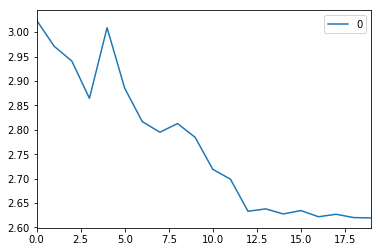

In [33]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [36]:
#Decision Tree
clf= DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train) 
y_pred = clf.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1]


In [37]:
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.externals.six import StringIO  
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# # Check the AUC for predictions
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :77.98165137614679

Confusion Matrix
----------------


Predicted,1,4,5,All
True,,,,
1,168,0,2,170
3,6,0,0,6
4,4,1,1,6
5,2,1,1,4
6,10,0,0,10
7,10,0,0,10
8,5,0,0,5
9,2,0,0,2
10,2,0,0,2


#### Reference
Scotland: 1  
USA : 2  
Canada: 3  
Ireland: 4  
Japan: 5  
Sweden: 6  
India: 7  
Taiwan: 8  
Wales: 9  
Swizerland: 10  
Finland: 11  
Tasmania: 12  
South Africa: 13  
Netherlands: 14  
England: 15  
Belgium: 16  
France: 17  
Ireland: 18  

In [38]:
#Regression Tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 10, max_depth=7, min_samples_leaf = 2)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=10, splitter='best')

In [39]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Make predictions and evaluate 
y_pred = regressor.predict(x_test)
print ('MSE score:', mse(y_test, y_pred))
print('R-sq score:',r2_score(y_test,y_pred))

MSE score: 6.830596277680191
R-sq score: -0.00632486972249513


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [41]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
tree_clf.feature_importances_

array([0.02174084, 0.        , 0.07440197, 0.        , 0.05323288,
       0.        , 0.47641748, 0.        , 0.07169891, 0.        ,
       0.        , 0.12316992, 0.05038352, 0.12895448, 0.        ,
       0.        , 0.        ])

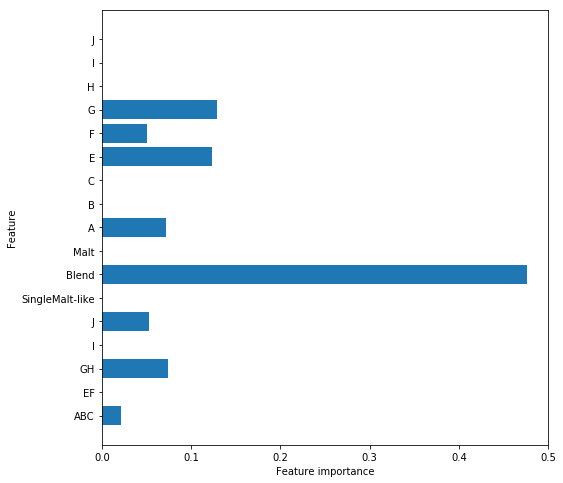

In [43]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

In [44]:
pred = tree_clf.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[168   0   0   2   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   1   1   0   0   0   0   0   0   0   0]
 [  2   0   1   1   0   0   0   0   0   0   0   0]
 [ 10   0   0   0   0   0   0   0   0   0   0   0]
 [ 10   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.79      0.99      0.88       170
           3       0.00      0.00      0.00         6
           4       0.50      0.17      0.25         6
           5       0.25      0.25      0.25         4
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
        

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Reference
Scotland: 1  
USA : 2  
Canada: 3  
Ireland: 4  
Japan: 5  
Sweden: 6  
India: 7  
Taiwan: 8  
Wales: 9  
Swizerland: 10  
Finland: 11  
Tasmania: 12  
South Africa: 13  
Netherlands: 14  
England: 15  
Belgium: 16  
France: 17  
Ireland: 18  

In [45]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))


Testing Accuracy for Decision Tree Classifier: 77.98%


In [46]:
#bagged test
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)


In [47]:
bagged_tree.fit(x_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [48]:
bagged_tree.score(x_train, y_train)


0.7488532110091743

In [49]:
print("Testing Accuracy for Bagged Tree Test: {:.4}%".format(bagged_tree.score(x_test, y_test)*100))

Testing Accuracy for Bagged Tree Test: 77.98%


In [50]:
#Random Forest
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
forest.score(x_train, y_train)

0.7488532110091743

In [52]:
print("Testing Accuracy for Random Forest Test: {:.4}%".format(forest.score(x_test, y_test)*100))


Testing Accuracy for Random Forest Test: 77.98%


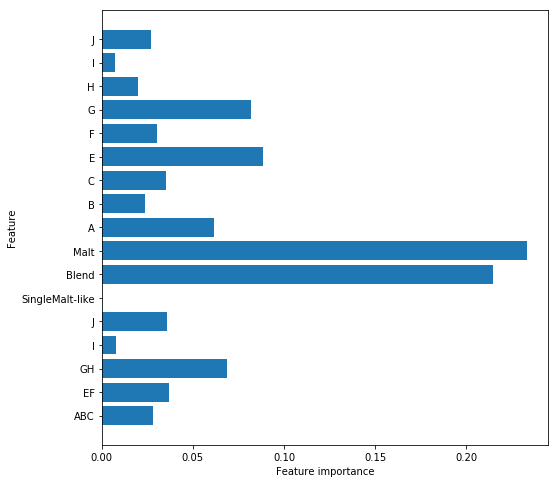

In [53]:
plot_feature_importances(forest)


In [54]:
#closer look at random forest, smaller trees reduced n_estimators, max features, and max depth
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

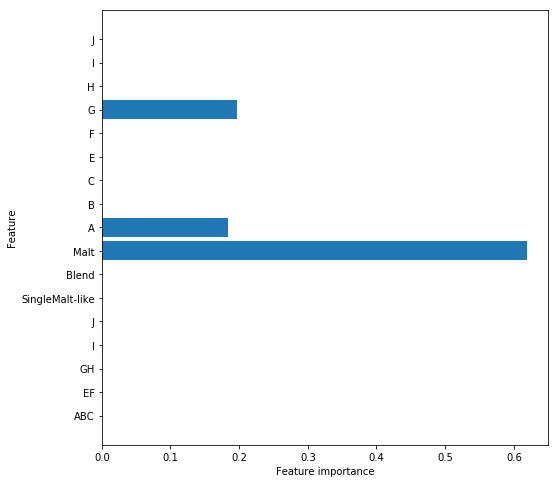

In [55]:
rf_tree_1 = forest_2.estimators_[0]
plot_feature_importances(rf_tree_1)

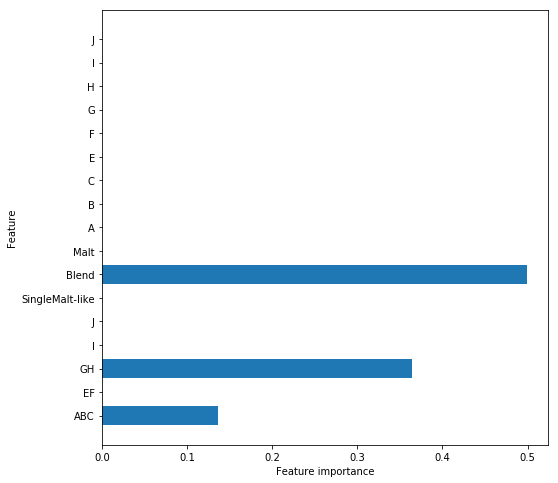

In [56]:
rf_tree_2 = forest_2.estimators_[1]
plot_feature_importances(rf_tree_2)

In [57]:
#Adaboost
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [58]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

In [66]:
ada = adaboost_clf.fit(x_train, y_train)


In [67]:
gboost = gbt_clf.fit(x_train, y_train)

In [62]:
adaboost_train_preds = adaboost_clf.predict(x_train)
adaboost_test_preds = adaboost_clf.predict(x_test)
gbt_clf_train_preds = gbt_clf.predict(x_train)
gbt_clf_test_preds = gbt_clf.predict(x_test)

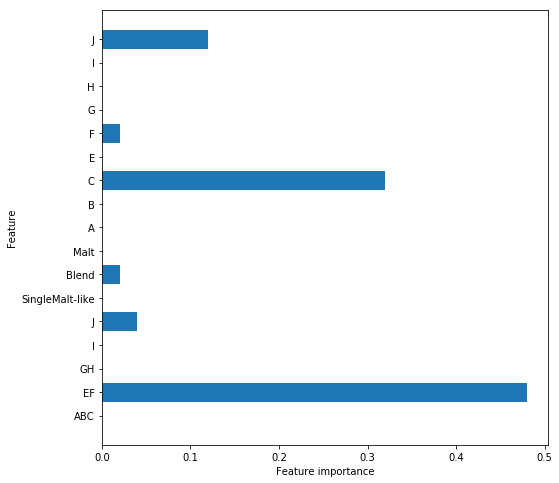

In [68]:
plot_feature_importances(ada)

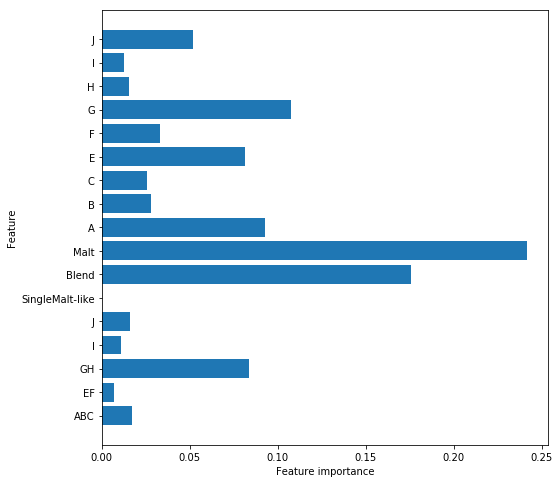

In [69]:
plot_feature_importances(gboost)

In [63]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average = 'micro')
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7454128440366973
F1-Score: 0.7454128440366974

Model: Gradient Boosted Trees
Accuracy: 0.7488532110091743
F1-Score: 0.7488532110091743

Testing Metrics
Model: AdaBoost
Accuracy: 0.7798165137614679
F1-Score: 0.779816513761468

Model: Gradient Boosted Trees
Accuracy: 0.7798165137614679
F1-Score: 0.779816513761468


In [64]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[168,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [70]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[168,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

#### Reference
Scotland: 1  
USA : 2  
Canada: 3  
Ireland: 4  
Japan: 5  
Sweden: 6  
India: 7  
Taiwan: 8  
Wales: 9  
Swizerland: 10  
Finland: 11  
Tasmania: 12  
South Africa: 13  
Netherlands: 14  
England: 15  
Belgium: 16  
France: 17  
Ireland: 18  

In [71]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           1       0.79      0.99      0.88       170
           3       0.00      0.00      0.00         6
           4       0.33      0.33      0.33         6
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

   micro avg       0.78      0.78      0.78       218
   macro avg       0.09      0.11      0.10       218
weighted avg       0.63      0.78      0.70       218



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           1       0.79      0.99      0.88       170
           3       0.00      0.00      0.00         6
           4       0.50      0.17      0.25         6
           5       0.25      0.25      0.25         4
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

   micro avg       0.78      0.78      0.78       218
   macro avg       0.13      0.12      0.11       218
weighted avg       0.64      0.78      0.70       218



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
#xgboost
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [25]:
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)
training_preds = clf.predict(x_train)
val_preds = clf.predict(x_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

ValueError: feature_names must be unique

In [26]:
param_grid = {
    "learning_rate": [.01],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [27]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(df, target)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(x_train)
val_preds = grid_clf.predict(x_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: feature_names must be unique

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

In [ ]:

clf.coef_

In [ ]:
clf.support_vectors_


In [ ]:
clf.score(x_test,y_test)